In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset

In [24]:
data=pd.read_csv('Churn_Modelling.csv')   #importing data

In [25]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
data.shape

(10000, 14)

# 3. Perform the Below Visualizations.

a).Univariate Analysis   b).Bi - Variate Analysis   c).Multivariate Analysis

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

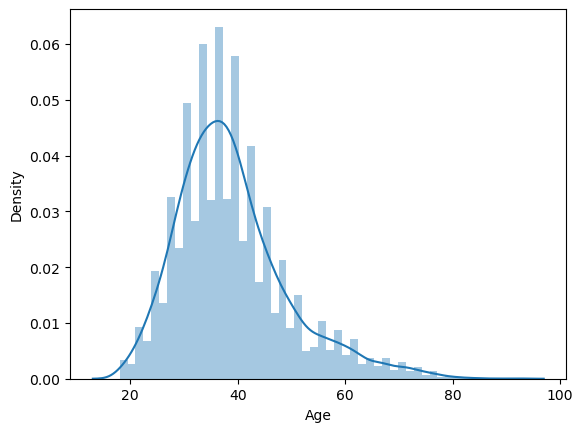

In [6]:
sns.distplot(data['Age'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Geography', ylabel='Exited'>

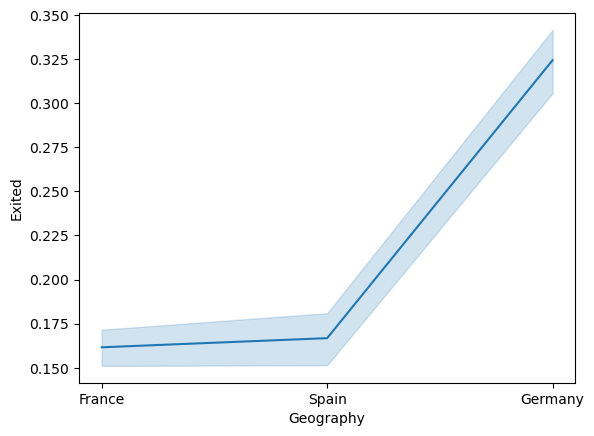

In [27]:
sns.lineplot(data['Geography'],data['Exited'])

Text(0.5, 1.0, 'Geography')

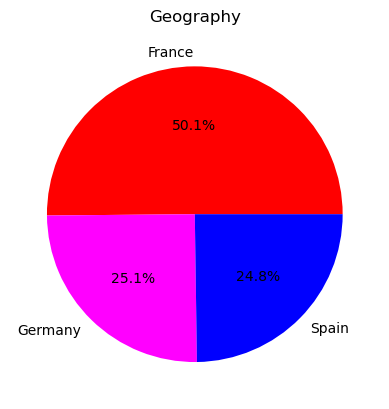

In [28]:
plt.pie(data.Geography.value_counts(),colors=['red','magenta','blue'],labels=['France','Germany','Spain'],autopct='%.1f%%')
plt.title('Geography')

# 4. Perform discriptive statistics on the dataset

In [29]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 5. Handling the missing values

In [30]:
data.isnull().sum()                 #there no is missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 6. Find the outliers and replace the outliers

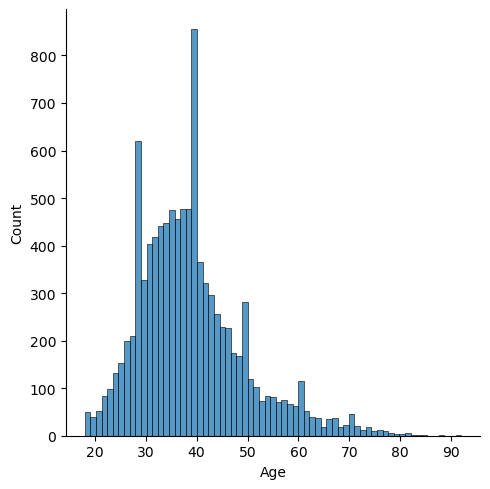

In [31]:
sns.displot(data['Age'])

<AxesSubplot:xlabel='Gender', ylabel='Age'>

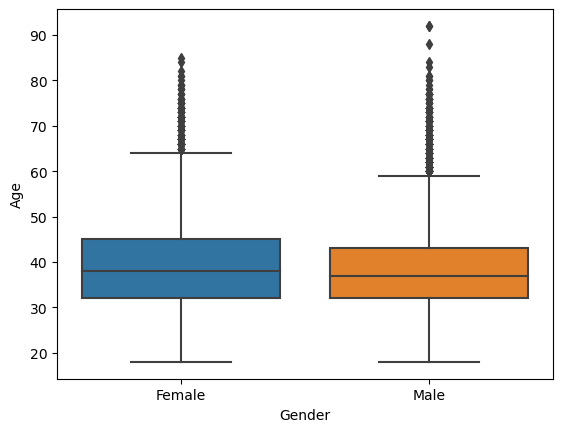

In [32]:
sns.boxplot(x='Gender',y='Age',data=data)

<AxesSubplot:ylabel='Age'>

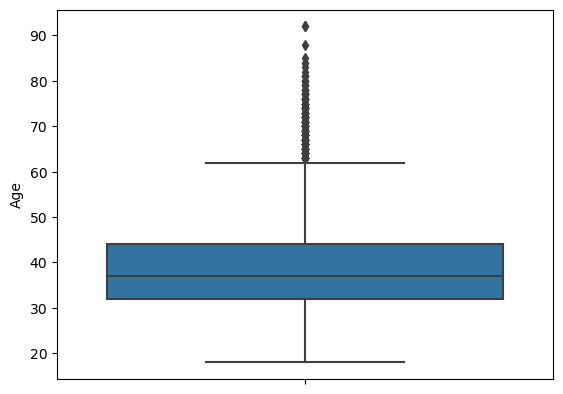

In [33]:
sns.boxplot(y='Age',data=data)

In [34]:
data['Age'].mean()

38.9218

In [35]:
df1=data[data['Age']<55]

<AxesSubplot:ylabel='Age'>

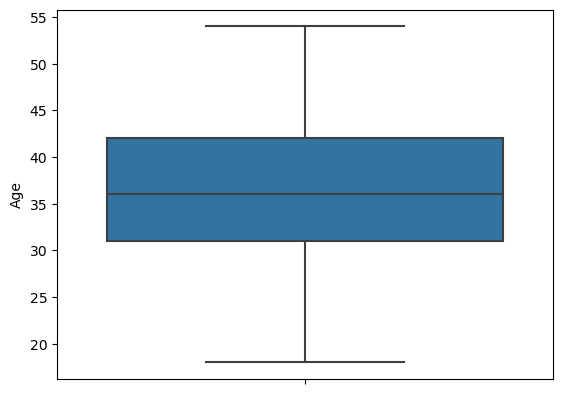

In [36]:
sns.boxplot(y='Age',data=df1)

In [37]:
df1['Age'].mean()

36.62250493529283

<AxesSubplot:>

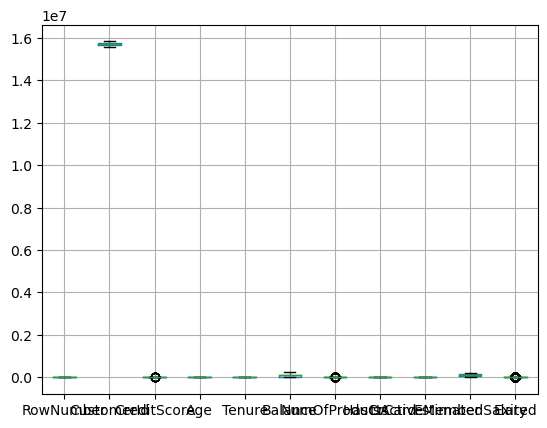

In [38]:
df1.boxplot()

# 7. Check for Categorical columns and perform encoding.

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['Geography']= le.fit_transform(data['Geography'])
data.Gender= le.fit_transform(data.Gender)
data['Geography'].unique()

array([0, 2, 1])

In [40]:
data['Gender'].unique()

array([0, 1])

# 8. Split the data into independent and dependent variable`

In [41]:
x=data.iloc[:,[4,5,6,11,12]]     #Independent variable 
x.head()

,Geography,Gender,Age,IsActiveMember,EstimatedSalary
0,0,0,42,1,101348.88
1,2,0,41,1,112542.58
2,0,0,42,0,113931.57
3,0,0,39,0,93826.63
4,2,0,43,1,79084.10


In [42]:
y=data.iloc[:,[13]]      #Dependent variable
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


# 9. Scale the independent variable

In [43]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
#x_train = sc.fit_transform(x_train)
data=ss.fit_transform(x)

In [29]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# 10. Split the data into training and testing

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
x_train.shape

(8000, 5)

In [46]:
y_train.shape

(8000, 1)

In [47]:
x_test.shape

(2000, 5)

In [48]:
y_test.shape

(2000, 1)